In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2024-03-24 06:02:20--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   111MB/s    in 1.3s    

2024-03-24 06:02:21 (111 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2024-03-24 06:02:21--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.207, 172.253.122.207, 172.253.63.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [ ]:
import zipfile
local_zip='./horse-or-human.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./horse-or-human')
# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

In [ ]:
import os
train_horse_dir=os.path.join('./horse-or-human/horses')
train_human_dir=os.path.join('./horse-or-human/humans')
# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_dir)
train_human_names=os.listdir(train_human_dir)
print(train_human_dir)
validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

./horse-or-human/horses
./horse-or-human/humans
VAL SET HORSES: ['horse1-455.png', 'horse1-554.png', 'horse1-539.png', 'horse3-484.png', 'horse5-032.png', 'horse1-568.png', 'horse2-314.png', 'horse3-198.png', 'horse4-389.png', 'horse6-089.png']
VAL SET HUMANS: ['valhuman04-03.png', 'valhuman01-04.png', 'valhuman03-15.png', 'valhuman05-10.png', 'valhuman04-04.png', 'valhuman01-12.png', 'valhuman01-01.png', 'valhuman02-12.png', 'valhuman04-13.png', 'valhuman03-05.png']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index=0

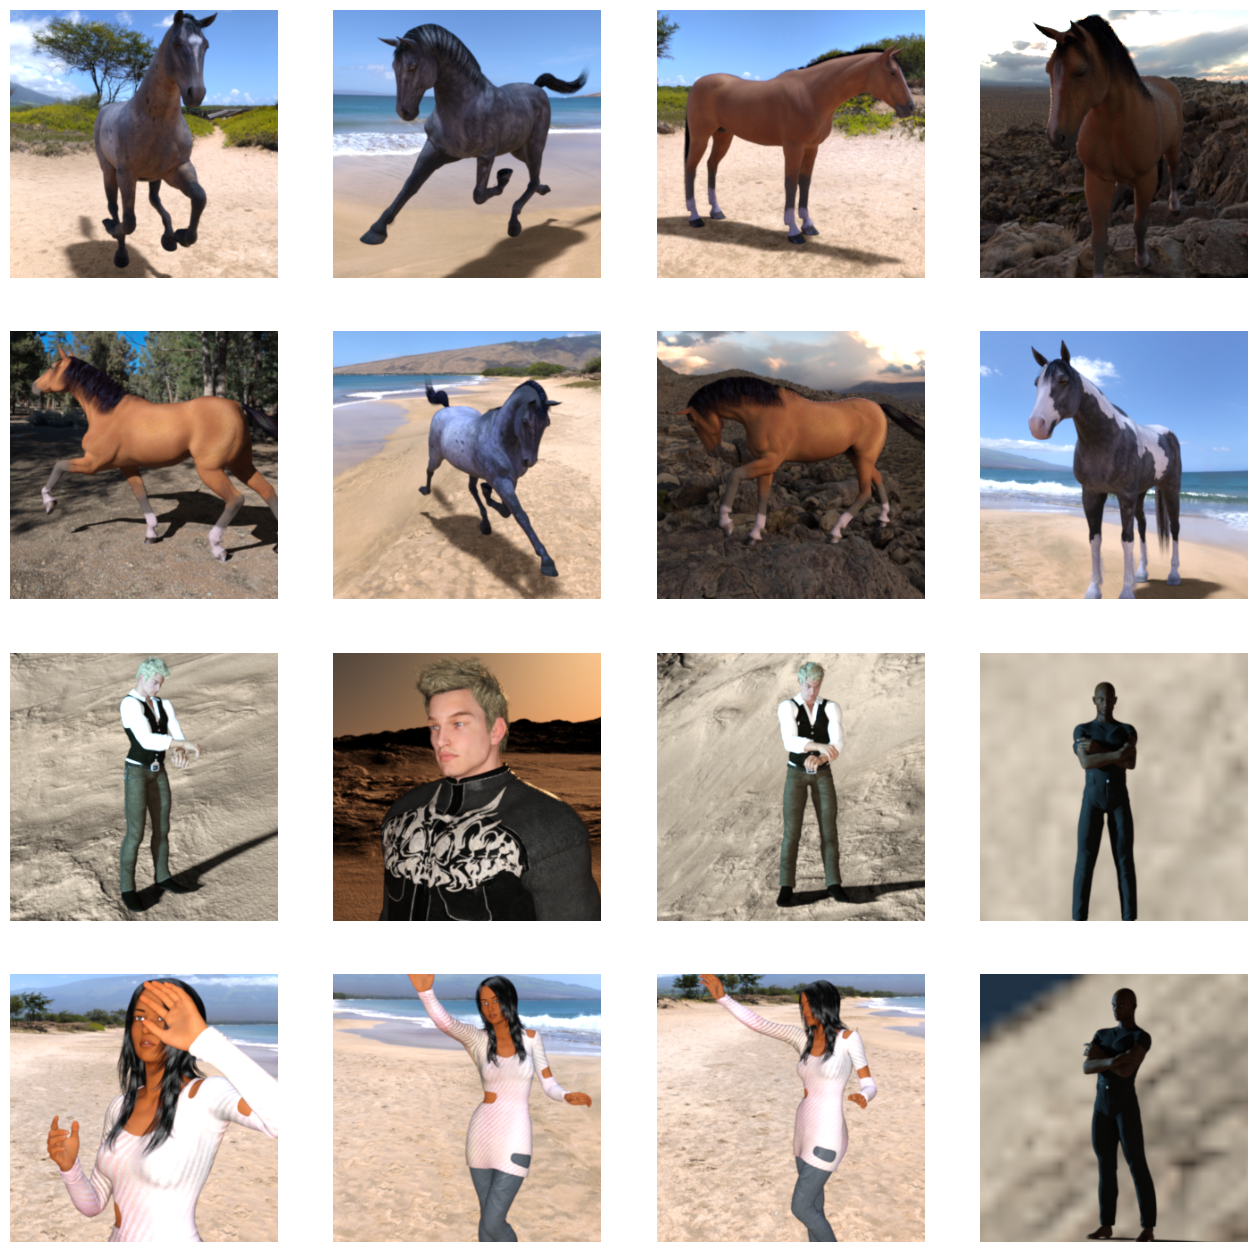

In [ ]:
fig=plt.gcf()
fig.set_size_inches(ncols * 4 , nrows *4)
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile( loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=.001),
               metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

validation_datagen= ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 1027 images belonging to 2 classes.


In [ ]:
history= model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 123s 16s/step - loss: 0.7635 - accuracy: 0.5128 - val_loss: 0.6842 - val_accuracy: 0.5127
Epoch 2/15
8/8 [==============================] - 119s 15s/step - loss: 0.6947 - accuracy: 0.6073 - val_loss: 0.6742 - val_accuracy: 0.8984
Epoch 3/15
8/8 [==============================] - 108s 14s/step - loss: 0.6530 - accuracy: 0.7119 - val_loss: 0.5428 - val_accuracy: 0.8984
Epoch 4/15
8/8 [==============================] - 129s 18s/step - loss: 0.5878 - accuracy: 0.7130 - val_loss: 0.4103 - val_accuracy: 0.8770
Epoch 5/15
8/8 [==============================] - 119s 15s/step - loss: 0.4815 - accuracy: 0.8131 - val_loss: 0.5163 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 120s 15s/step - loss: 0.3824 - accuracy: 0.8532 - val_loss: 0.2493 - val_accuracy: 0.9199
Epoch 7/15
8/8 [==============================] - 120s 15s/step - loss: 0.2723 - accuracy: 0.8921 - val_loss: 0.3402 - val_accuracy: 0.9170
Epoch 8/15
8/8 [====

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/'+fn
  img= load_img(path,target_size=(300,300))
  x=img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>.5:
    print(fn+'is a human')
  else:
    print(fn+'is a horse')

Saving WhatsApp Image 2024-03-10 at 12.33.15 PM.jpeg to WhatsApp Image 2024-03-10 at 12.33.15 PM.jpeg
1/1 [==============================] - 0s 39ms/step
[0.]
WhatsApp Image 2024-03-10 at 12.33.15 PM.jpegis a horse
